In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [2]:
df = pd.read_csv('C:/Users/darsh/OneDrive/Desktop/housing_Assiement.csv',names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],delim_whitespace=True,)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('MEDV',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('MEDV',axis=1))

In [8]:
scaled_features

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [9]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
df_feat= pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
df_feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df_feat
y=df['MEDV']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=85)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
from sklearn.model_selection import GridSearchCV
nparams = {'n_neighbors':(range(1 ,100))}

In [93]:
knn = KNeighborsRegressor()

In [94]:
model = GridSearchCV(knn,params,cv=5)

model.fit(x_train,y_train)

In [95]:
model.fit(x_train,y_train)


C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
model.best_params_

{'n_neighbors': 3}

In [179]:
pred = model.predict(x_test)

In [224]:
knn1 = KNeighborsRegressor(n_neighbors=3)

In [225]:
knn1.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [226]:
predection = knn1.predict(x_test)

In [227]:
predata = pd.DataFrame({'Actual':y_test,'Predection':predection})
print(predata)

     Actual  Predection
27     14.8   14.533333
311    22.1   23.233333
105    19.5   19.966667
117    19.2   19.666667
66     19.4   22.833333
..      ...         ...
437     8.7    9.933333
471    19.6   20.733333
106    19.5   19.966667
485    21.2   21.400000
198    34.6   33.466667

[102 rows x 2 columns]


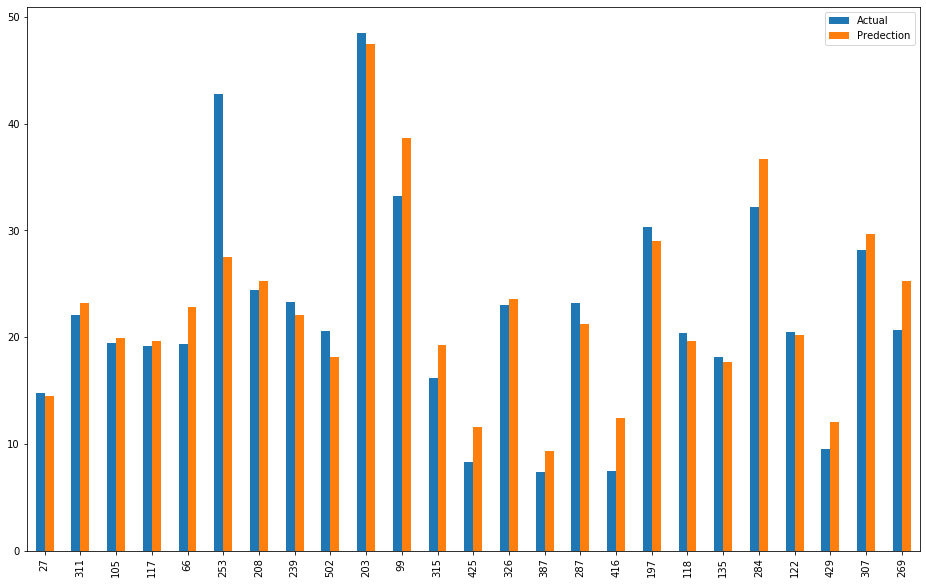

In [228]:
df1= predata.head(25)
df1.plot(kind = 'bar',figsize=(16,10))

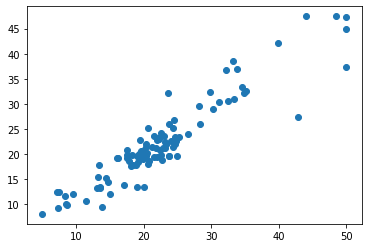

In [229]:
plt.scatter(y_test,predection)

In [236]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score

In [237]:
mean_absolute_error(y_test,predection)

2.369281045751633

In [238]:
mean_squared_error(y_test,predection)

10.863594771241829

In [239]:
r2_score(y_test,pred)

0.8686138404009693

In [240]:
explained_variance_score(y_test,predection)

0.8694077395445805